# Classification

## Loading data

In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import os

In [2]:
classification_data=joblib.load('C:\\Users\\CSC\\Documents\\Portfolio\\Superstore project\\data\\cleaned_superstore_data.csv')

In [3]:
classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   category      
 4   Customer ID    9994 non-null   object        
 5   Segment        9994 non-null   category      
 6   City           9994 non-null   object        
 7   State          9994 non-null   object        
 8   Region         9994 non-null   category      
 9   Product ID     9994 non-null   object        
 10  Category       9994 non-null   category      
 11  Sub-Category   9994 non-null   category      
 12  Sales          9994 non-null   float64       
 13  Quantity       9994 non-null   int64         
 14  Discount       9994 non-null   float64       
 15  Profit         9994 n

## Feature selection

In [4]:
classification_data['Profit Class']=np.where(classification_data['Profit']>0,1,0)

In [5]:
columns_to_drop=['Order ID','Order Date','Ship Date','Ship Mode','Customer ID','City','State','Product ID','Profit','Year','Month','Day','DayName','Quarter','Delivery Days']

classification_data=classification_data.drop(columns_to_drop,axis=1)

In [6]:
classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Segment       9994 non-null   category
 1   Region        9994 non-null   category
 2   Category      9994 non-null   category
 3   Sub-Category  9994 non-null   category
 4   Sales         9994 non-null   float64 
 5   Quantity      9994 non-null   int64   
 6   Discount      9994 non-null   float64 
 7   Profit Class  9994 non-null   int32   
dtypes: category(4), float64(2), int32(1), int64(1)
memory usage: 312.7 KB


## EDA

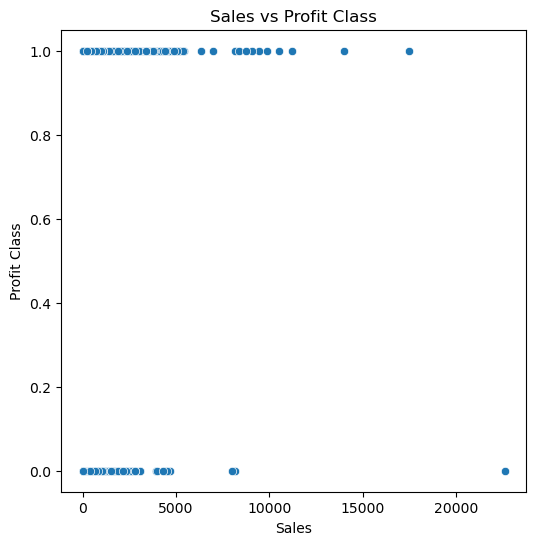

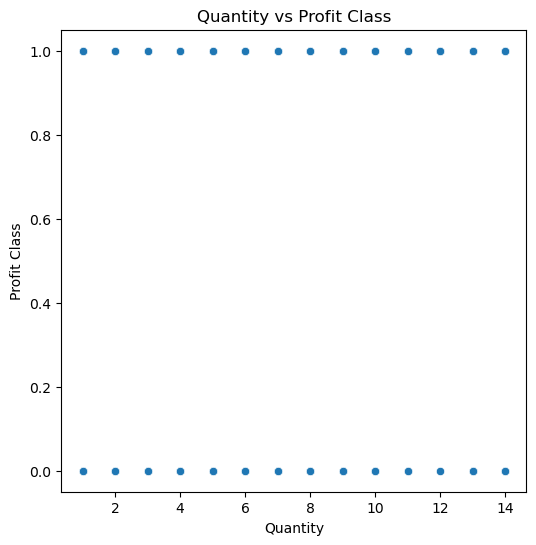

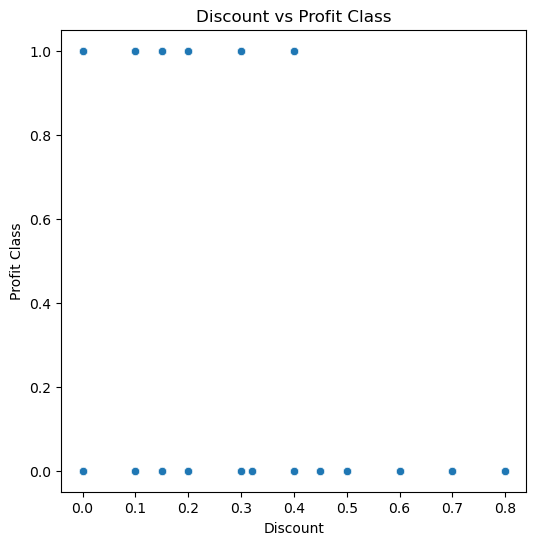

In [7]:
numeric_features=['Sales','Quantity','Discount']

for col in numeric_features:
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=classification_data[col],y=classification_data['Profit Class'])
    plt.title(f'{col} vs Profit Class')
    plt.show()

## Encoding categorical features

In [8]:
classification_data=pd.get_dummies(classification_data,drop_first=True)

## Train - Test split

In [9]:
x=classification_data.drop('Profit Class',axis=1)
y=classification_data['Profit Class']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Model training

### Model 1 : Logistic Regression

In [12]:
lr=LogisticRegression(max_iter=1100)
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       377
           1       0.95      0.98      0.96      1622

    accuracy                           0.94      1999
   macro avg       0.92      0.88      0.90      1999
weighted avg       0.94      0.94      0.94      1999



### Model 2 : Random Forest Classifier

In [14]:
params={
    'n_estimators':[200,300],
    'max_depth':[5,7],
    'min_samples_split':[2,4],
    'min_samples_leaf':[1,3],
    'criterion':['gini','entropy']
}

base_model=RandomForestClassifier(random_state=42)

grid=GridSearchCV(base_model,param_grid=params,scoring='accuracy')
grid.fit(x_train,y_train)

print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.9395872420262664


In [15]:
rfc_best_params=grid.best_params_

In [13]:
rfc_best=RandomForestClassifier(n_estimators=200,min_samples_split=2,min_samples_leaf=1,max_depth=7,criterion='gini',random_state=42)
rfc_best.fit(x_train,y_train)
y_pred_rfc_best=rfc_best.predict(x_test)

print(classification_report(y_test,y_pred_rfc_best))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83       377
           1       0.94      1.00      0.97      1622

    accuracy                           0.94      1999
   macro avg       0.96      0.85      0.90      1999
weighted avg       0.95      0.94      0.94      1999



### Model 3 : XGBClassifier

In [50]:
params={
    'n_estimators':[200,300],
    'learning_rate':[0.1],
    'max_depth':[5,6,7],
    'subsample':[0.7,0.8,1],
    'colsample_bytree':[0.7,0.8,1]
}

base_model=XGBClassifier(random_state=42)

grid=GridSearchCV(base_model,param_grid=params,scoring='accuracy')
grid.fit(x_train,y_train)

print(grid.best_params_)
print(grid.best_score_)

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}
0.9470919324577862


In [52]:
xgbc_best_params=grid.best_params_

In [11]:
xgbc_best=XGBClassifier(n_estimators=200,learning_rate=0.1,max_depth=5,subsample=0.7,colsample_bytree=0.7,random_state=42)
xgbc_best.fit(x_train,y_train)
y_pred_xgbc_best=xgbc_best.predict(x_test)

print(classification_report(y_test,y_pred_xgbc_best))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       377
           1       0.96      0.98      0.97      1622

    accuracy                           0.95      1999
   macro avg       0.93      0.89      0.91      1999
weighted avg       0.95      0.95      0.95      1999



## Evaluation and visualization

In [12]:
report=classification_report(y_test,y_pred_xgbc_best,output_dict=True)

In [25]:
print(f'Class 0 metrics : {report['0']}')
print(f'Class 1 metrics : {report['1']}')
print(f'Accuracy : {report['accuracy']}')

Class 0 metrics : {'precision': 0.9047619047619048, 'recall': 0.8063660477453581, 'f1-score': 0.85273492286115, 'support': 377.0}
Class 1 metrics : {'precision': 0.9561034275405893, 'recall': 0.9802712700369913, 'f1-score': 0.9680365296803652, 'support': 1622.0}
Accuracy : 0.9474737368684342


<Figure size 600x600 with 0 Axes>

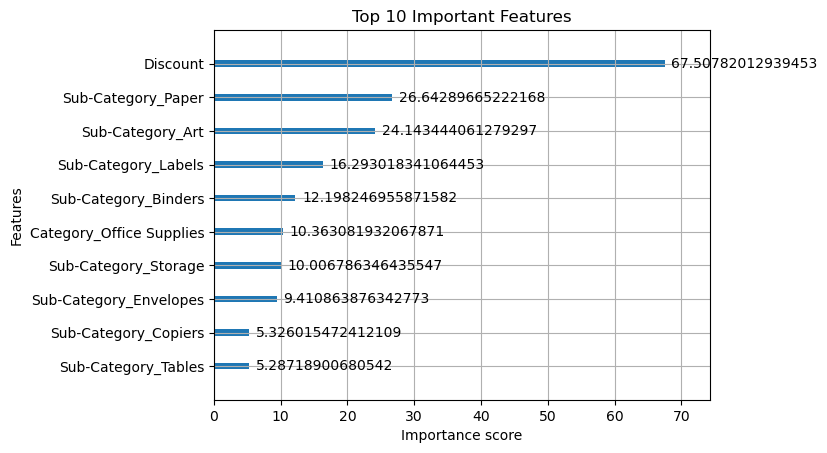

In [13]:
plt.figure(figsize=(6,6))
xgb.plot_importance(xgbc_best,max_num_features=10,importance_type='gain')
plt.title("Top 10 Important Features")

plt.savefig('feature_importance_plot.png', bbox_inches='tight')
plt.show()

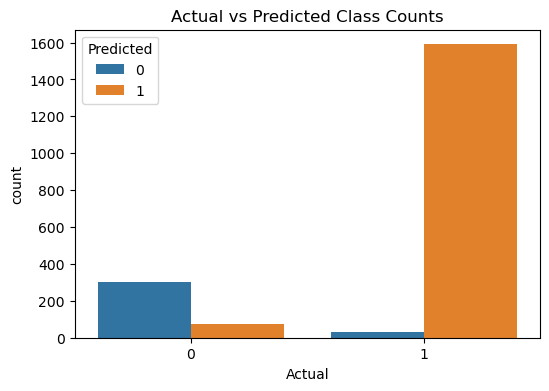

In [48]:
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgbc_best})

plt.figure(figsize=(6,4))
sns.countplot(data=compare_df, x='Actual', hue='Predicted')
plt.title('Actual vs Predicted Class Counts')
plt.show()

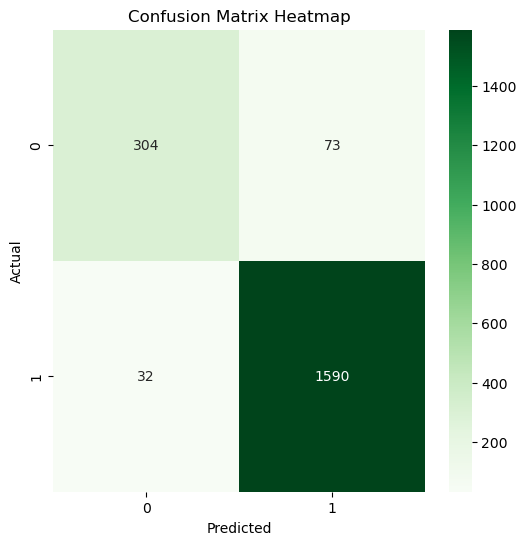

In [14]:
cm=confusion_matrix(y_test,y_pred_xgbc_best)

plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

plt.savefig('confusion_matrix.png', bbox_inches='tight')
plt.show()

## Saving resutls

### 1.Model

In [49]:
file_name='XGBClassifier.joblib'
file_path=r'C:\Users\CSC\Documents\Portfolio\Superstore project\Saved models\Classification'
full_path=os.path.join(file_path,file_name)

joblib.dump(xgbc_best,full_path)

['C:\\Users\\CSC\\Documents\\Portfolio\\Superstore project\\Saved models\\Classification\\XGBClassifier.joblib']

### 2.Best parameters

In [54]:
file_name='best_params.joblib'
file_path=r'C:\Users\CSC\Documents\Portfolio\Superstore project\Saved models\Classification'
full_path=os.path.join(file_path,file_name)

joblib.dump(xgbc_best_params,full_path)

['C:\\Users\\CSC\\Documents\\Portfolio\\Superstore project\\Saved models\\Classification\\best_params.joblib']

### 3.Model metrics

In [56]:
file_name='classification_report.joblib'
file_path=r'C:\Users\CSC\Documents\Portfolio\Superstore project\Saved models\Classification'
full_path=os.path.join(file_path,file_name)

joblib.dump(report,full_path)

['C:\\Users\\CSC\\Documents\\Portfolio\\Superstore project\\Saved models\\Classification\\classification_report.joblib']

In [57]:
file_name='confusion_matrix.joblib'
file_path=r'C:\Users\CSC\Documents\Portfolio\Superstore project\Saved models\Classification'
full_path=os.path.join(file_path,file_name)

joblib.dump(cm,full_path)

['C:\\Users\\CSC\\Documents\\Portfolio\\Superstore project\\Saved models\\Classification\\confusion_matrix.joblib']

### 4.Feature importance

In [58]:
importance=xgbc_best.get_booster().get_score(importance_type='gain')

importance_df=pd.DataFrame({
    'Feature':importance.keys(),
    'Importance':importance.values()
})

file_name='feature_importance.joblib'
file_path=r'C:\Users\CSC\Documents\Portfolio\Superstore project\Saved models\Classification'
full_path=os.path.join(file_path,file_name)

joblib.dump(importance_df,full_path)

### 5.Results Dataframe

In [71]:
x_test_reset=x_test.reset_index(drop=True)
y_test_reset=y_test.reset_index(drop=True)

results=x_test_reset.copy()
results['Actual Profitability']=y_test_reset
results['Predicted Profitability']=y_pred_xgbc_best

results['Actual Profitability']=results['Actual Profitability'].map({0:'Non Profitable',1:'Profitable'})
results['Predicted Profitability']=results['Predicted Profitability'].map({0:'Non Profitable',1:'Profitable'})

file_name='results.joblib'
file_path=r'C:\Users\CSC\Documents\Portfolio\Superstore project\Saved models\Classification'
full_path=os.path.join(file_path,file_name)

joblib.dump(results_df,full_path)